# Sentiment Analysis of tweets

In [1]:
# pip install tweepy
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from string import punctuation
from nltk.corpus import stopwords
import re
import nltk
import numpy as np
import pandas as pd

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\korupos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\korupos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
#nltk.download('vader_lexicon')

In [3]:
#Running the python script containing API keys
%run C:\\Users\\korupos\\Documents\\Sentiment\\key.ipynb

In [4]:
auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# The last command prints a message and waits if the rate limit is exceeded
# Twitter allows 15 requests per application per 15 minutes

## this chunk takes too long to scrape

In [ ]:
# df = pd.DataFrame(columns=['screen_name', 'name', 'date_time', 'location', 'text'])
# x = "desantis"

# for tweet in tweepy.Cursor(api.search, q= x, count=1000, result_type="recent",
#                            include_entities=True, lang="en").items():
#     df = df.append(pd.Series([tweet.user.screen_name, tweet.user.name, tweet.created_at, tweet.user.location, tweet.text], index=df.columns), ignore_index=True)

# df.shape #query results stored in 'df' dataframe

## This scrapes quickly but have to check max tweets that could be scraped

In [5]:
df = pd.DataFrame(columns=['screen_name', 'name', 'date_time', 'location', 'text', 'url'])
x = "desantis"
for tweet in tweepy.Cursor(api.search, q=x, lang='en', tweet_mode="extended").items(1000):
    df = df.append(pd.Series([tweet.user.screen_name, tweet.user.name, tweet.created_at, tweet.user.location, tweet.full_text, f"https://twitter.com/{tweet.user.screen_name}/status/{tweet.id}"], index=df.columns), ignore_index=True)
df.shape

Rate limit reached. Sleeping for: 35


(1000, 6)

In [ ]:
# for tweet in tweepy.Cursor(api.search, q='sample', count=10,tweet_mode='extended').items():
#     print(f"https://twitter.com/{tweet.user.screen_name}/status/{tweet.id}")

https://twitter.com/helloimhuman123/status/1391831760015560705
@NASASolarSystem When the sample reaches home, it'll have been a huge step for mankind! Congratulations 👏
https://twitter.com/LioFotia5/status/1391831717527400451
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/t3t0bean/status/1391831708501037056
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/siriusenochikai/status/1391831698925625344
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/PalssonThordur/status/1391831697902247940
RT @trengriffin: "Of the roughly 26,000 companies listed between 1926 and 2016, more than half lost money or did worse than simply holding…
https://twitter.com/seekittens/status/1391831688586555395
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/kyfri11/status/1391831685264822274
According to a “random” sample of 1000 Democrats

https://twitter.com/kirigiricoconut/status/1391831317499846661
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/NishiNegi/status/1391831311602565121
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/chris_roberson/status/1391831306774876161
While searching through some old files, I just found an INCREDIBLY detailed history I wrote of a fictional band that appeared in exactly one issue of iZombie, but which no one but me has ever read. Entire discography, bios for every member, and sample lyrics.
https://twitter.com/Desi_inginear1/status/1391831287766290432
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a legit press conference.
https://twitter.com/MomladyViolet/status/1391831286080184322
RT @AnnieGabstonH: Which Kentucky race are you more suspicious of?

Please respond and retweet for a larger sample size.
https://twitter.com/Shokenfi/status/1391831279654477826
RT @floofyfluff

https://twitter.com/uarizona/status/1391830861683720193
RT @NASASolarSystem: And now it’s time to bring that sample back to Earth. Join us later today as OSIRIS-REx says goodbye to Bennu and begi…
https://twitter.com/thelarppremx/status/1391830860194844673
Larp Premx  Ft Neşet Ertaş - Yazımı Kışa Çevirdin. [Trap Instrumental] on #SoundCloud #np https://t.co/AuGJfiXzGB
https://twitter.com/BaileyDalecape/status/1391830858089308160
RT @SuperRedWine: South Africa is amazing!

To vote 18 times you just need an ID and soap to wash your thumb.

But to get a mobile sim card…
https://twitter.com/LustSenpai/status/1391830835465113604
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/Erimonzen/status/1391830833217028096
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/OffshoreKings/status/1391830832109740034
@mqhele_maphala Okay thanks let me sa

https://twitter.com/VeronicaBalton/status/1391830465405865984
@vatfair3nculer i can design you a logo 
for sample DM me!
https://twitter.com/indiebychoice/status/1391830459806490625
Missed last months #indie #Freestyle #Contest.. Here is a sample from previous winner daydabass, https://t.co/mjCC9T2Frl. Catch more of daydabass music at https://t.co/Cg6umv20di https://t.co/9q1XvMkLQW
https://twitter.com/Cyasashiku/status/1391830450679681032
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/gr3gory_b/status/1391830445575262209
RT @evilswrld: Making beats around acapellas is always fun

Sample by @gr3gory_b https://t.co/F6ViN2uuwZ
https://twitter.com/2ndofjan/status/1391830434284072960
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/flightdealrss/status/1391830433038536708
Qatar Airways: Portland – Amman, Jordan. $804. Roundtrip, includi

https://twitter.com/colinwbradbury/status/1391829768077729804
@DemiplaneRPG that is just a sample of the systems I have played. I have also played many iterations of Call of Cthuhlu, Warhammer Fantasy, and so many other I can't remember them all.
Almost exclusivly Theatre of the Mind.
https://twitter.com/maruthi_ram/status/1391829763996536834
RT @KutchDdo: Update: RT-PCR.

Tomorrow onwards, RT PCR sample results will be communicated latest by the end of next day of sample collect…
https://twitter.com/ShahriyarGourgi/status/1391829728173117443
RT @NASASolarSystem: And now it’s time to bring that sample back to Earth. Join us later today as OSIRIS-REx says goodbye to Bennu and begi…
https://twitter.com/Scorpio_Oso/status/1391829727632056325
@MoneyBaggYo Bruh ts hot garbage I’m sorry bruh ain’t do that sample justice lbs some beats just shouldn’t be touched
https://twitter.com/wuezellynjuv/status/1391829718794522626
RT @izzy_1989_: found this dress at a sample sale... swiffers know i just

https://twitter.com/shawna_guenther/status/1391829192627482626
Don't forget to send your stool sample in for colon/rectal screening. It saved my brother's life.

#coloncancer
#gettested
#preventativemedicine
https://twitter.com/TheReal_KDubb/status/1391829181965742088
NASA spacecraft carrying history-making asteroid sample will head toward Earth https://t.co/8DndckUOhe #mustread #feedly
https://twitter.com/dskloet/status/1391829180787134466
@MasterTimBlais What would be a reasonable sample size to be confident about such a general claim?
https://twitter.com/Yoo_jinjoo/status/1391829174772396034
Paano ung wild? Sample nga po #lubogistakalat
https://twitter.com/RadioSkyMusic/status/1391829165935104005
Randy Crawford &amp; Joe Sample - But Beautiful -- https://t.co/efNDD2lURA  Good Listening
https://twitter.com/ASTER0KI/status/1391829165771431936
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
http

https://twitter.com/ACEEKIMM/status/1391828650605957122
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/iamhacker/status/1391828648576000001
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a legit press conference.
https://twitter.com/AjuriNgelale/status/1391828646109851658
RT @NGRPresident: Sites have also been identified in Abuja including at Dei Dei where Vice President @ProfOsinbajo earlier visited to see t…
https://twitter.com/amfcf/status/1391828640250441728
RT @PatCummingsTIF: Just for perspective on timing, the KHRC's fine of Bob Baffert following her positive test (for betamethasone) in the 2…
https://twitter.com/x1venteen/status/1391828625784066049
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/UltzOConnell/status/139182862089788211

https://twitter.com/NenaghGuardian/status/1391828196971122695
RT @BorrisokaneCC: TY Future Leader class ran an event to promote healthy eating and allow students to sample healthy smoothies, as part of…
https://twitter.com/kkfrogbert/status/1391828191732404224
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/Ssraziza_32/status/1391828184828686337
if I want Next Manchester Mayor can be Boris candidate having all your success x y z...😜😜😜

show you any sample?
https://twitter.com/starsdiefaraway/status/1391828178830725121
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/Humanityismyre9/status/1391828161239785475
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a legit press conference.
https://twitter.com/Worrelpa/status/1391828156668121090
RT @climicrosoft365: 📣 New #CLIMicrosoft365 beta with uploading files using #MicrosoftGraph, retrieving #AzureAD app roles, new sample for…
ht

https://twitter.com/bishopsring_/status/1391827654895149059
CNN : NASA spacecraft carrying history-making asteroid sample will head toward Earth.
https://t.co/liHM3kFWIu

via @GoogleNews
https://twitter.com/Asia09568097/status/1391827649719328772
RT @drhalat: Millionaire  offers $1.2 M reward to anyone providing an isolated sample of the COVID-19 virus https://t.co/6EteguFDaV
https://twitter.com/Birdmoneyy/status/1391827644065349632
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/Janet_McH/status/1391827637752975363
Sample #phled elementary school calendar for May.  What a waster of time and resources &amp; putting staff &amp; students at risk.  All for 1 - 5 kids in any given grade to take a stupid test that means absolutely nothing.  No interaction with friends. Absolute disgrace. https://t.co/UwOGeKiCLj
https://twitter.com/LJeanny1/status/1391827627380330496
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote fo

https://twitter.com/amand_amaclean/status/1391826968069378048
RT @rodger: This obviously didn’t happen but I really want to how much cough medicine someone would have to take for there to be enough in…
https://twitter.com/blahwhatsam/status/1391826923597320193
RT @rodger: This obviously didn’t happen but I really want to how much cough medicine someone would have to take for there to be enough in…
https://twitter.com/kwan_flower/status/1391826910955646977
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/CryptoPopcatNFT/status/1391826886364442627
@RealmissNFT A sample of CryptoPopcats on my @opensea Collection.

https://t.co/EG4sks0tlI https://t.co/duRZ4AiwY6
https://twitter.com/JolkazUK2/status/1391826882757332997
RT @drhalat: Millionaire  offers $1.2 M reward to anyone providing an isolated sample of the COVID-19 virus https://t.co/6EteguFDaV
https://twitter.com/Piotr88299498

https://twitter.com/thumbsupdeals/status/1391826519996129288
I’m aware that these sample sizes are small. I guess you could say 99% of people said they never respond to polls 🗳
https://twitter.com/DeNaseer/status/1391826515277488131
RT @JazeeraBrk: #JazeeraLIVE: 3000'ah vure gina sample IGMH ga pending  gai ebahuri. Egothun IGMH ge backlog clear kuran e hospital'in masa…
https://twitter.com/bishopdave1965/status/1391826511959896066
RT @avn001: If not a single sample of Covid-19 virus can be found in the USA, perhaps we can extend the challange to all medics in RSA. Sho…
https://twitter.com/Zayryo/status/1391826510592585731
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/CDNSpacegal/status/1391826497585909766
RT @csa_asc: OSIRIS-REx spacecraft begins its homecoming today! In exchange for contributing to the mission, Canada will receive part of th…
https://twitter.com/vine_terranova/status/1391826481626718211
Acho perspicaz demais a Slayyyter 

https://twitter.com/shuazhongpwark/status/1391825853621817348
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/BotCstm/status/1391825837478092803
2012.0321.001 Paper envelope with biological sample of mouse fur with some skin attached inside. A stored biological specimen kept as material for preparing microscope slides. https://t.co/rU0PHaE17V https://t.co/HNjR2sbEKm
https://twitter.com/Fem_Shepard_/status/1391825833598332929
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/Only_DB3/status/1391825831442280453
RT @NASAEarth: OSIRIS-REx starts its journey back to Earth today, bringing a sample that will help us understand the origins of our solar s…
https://twitter.com/BeychokRacing/status/1391825808692482048
RT @ShuveeIL: Baffert on Fox News this morning: “Bob Baffert is not stupid,” he said. “That is not a drug that I would use on a 

https://twitter.com/SPHDPHPPH/status/1391825319670075394
RT @tellymclean: Much love to all the folks at @todaysfuturesound Global Beat Cypher, got to hear some amazing flips from @philthydrummond…
https://twitter.com/CPAWeldonMutai/status/1391825317812183045
RT @SigonaGolfClub: As we welcome our members back, sample out the new menu and the crazy offer @SigonaGolfClub https://t.co/t8b1QOtGbb
https://twitter.com/MonicaGZB/status/1391825314376998918
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/319hina/status/1391825302892859395
新しい興奮を覚えるかも・・・https://t.co/UZLGDEFJPF
https://twitter.com/kyonyu88/status/1391825302003716096
おっぱい星人に必見。https://t.co/9syJBGGH89
https://twitter.com/jenstippich/status/1391825299583602688
RT @latimes: “One More Time" became Daft Punk’s biggest hit &amp; first million-selling single, sampling Eddie Johns' 1979 song "More Spell on…
https://twitter.com/La

https://twitter.com/jaddriscoll/status/1391824731863724042
@RTalsorianGames @MonsterFight31 Just found this album today - def gonna have it in the background of any Cyberpunk game I'm playing!  #combatzone Sample below:
https://t.co/Yvdebj04AX
https://twitter.com/KDurrigan/status/1391824728701161478
@jaclyndurrigan @SteveMartinToGo Same call, but they wanted a blood and seman sample. Oh boy I think I messed up again.
https://twitter.com/TheoDia07928816/status/1391824671574695938
RT @Me_For_Photon: Yess BollywoodFull Of Druggies ‼️

That's why they don't know how to respect Police officers The  Heroes of The Nation..…
https://twitter.com/AlnuaimiNasser1/status/1391824669897015297
#GCC: turning 40 - Arab Digest https://t.co/iprGElGJXN
https://twitter.com/ztizro/status/1391824665576943616
RT @PeruginiNic: These days Israel (its courts, its occupation forces, its key state apparatuses) is proudly displaying, with unequivocal a…
https://twitter.com/PupTartBites/status/1391824634341904384
RT

https://twitter.com/PrasenjeetBagc4/status/1391824142077292550
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a legit press conference.
https://twitter.com/kraftymax/status/1391824126998896643
Christmas Flowers Beadwoven 5×7 Wall Art – Sample for September 2020 Kit
https://t.co/3gKAfjZ2iP
$ 127.00
#beadwoven #wallart #art #offloom #peyote #original #handmade #buyhandmade #handmadelove #handcrafted #kraftymax #kmax https://t.co/hiQnEWG0oQ
https://twitter.com/imsurndra/status/1391824119923085315
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a legit press conference.
https://twitter.com/ryukomii/status/1391824117284888577
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/LatulippeMyriam/status/1391824101451382784
RT @NASASolarSystem: And now it’s time to bring that sample back to Earth. Join us later today as OSIRIS-REx says goodbye to Bennu and begi…
https://twitter.com/Eliteweek3306/status/139182

https://twitter.com/SciFiBradley/status/1391823400046272512
RT @NASASolarSystem: Parting is such sweet sorrow. Today our #OSIRISREx spacecraft says goodbye to Bennu after orbiting the asteroid for th…
https://twitter.com/SpadeHarris/status/1391823364101115906
Depressed and thought of a sample.
Just thought of a 🔥idea of how my heartbreak is @Timbaland
#SpadeOProduktiunz #BeatsBySp8de #bawlnonabugitwrekordz #producer #producerlife
https://t.co/MeiBNvRpSj
https://twitter.com/OxfordJournals/status/1391823361626435587
Do journalists have an ethical or moral responsibility to society? What impact does technology have on journalism?

Discover our portfolio of journalism books &amp; journals, read articles &amp; sample chapters, &amp; explore what's new from Oxford University Press: https://t.co/6YS5aWxoy0 https://t.co/SJT36LdNgt
https://twitter.com/DJmag/status/1391823355091853315
Eddie Johns, whose 1979 track 'More Spell On You' was sampled by Daft Punk for 'One More Time', has never receiv

https://twitter.com/Asma_Jun_17/status/1391822765255282690
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/rahmats_i/status/1391822762176442374
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a legit press conference.
https://twitter.com/_kyr3_/status/1391822744400982019
RT @b_l_fifth: 🍾中島ヨシキ＆鈴木崚汰のBrilliant Luxury！🍾
#ヨすBL

【コラボカフェ事前登録受付中】
https://t.co/dh8afVXb4k
※事前登録がないと、カフェをご利用いただけません。
※グッズ購入は事前登録なしで可能です。…
https://twitter.com/Riakura_/status/1391822739095293959
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/DBlagajcevic/status/1391822727347068938
@BruceBe68707869 @Batesstan30 9.5 games 
He wouldve played the NYG, PIT, BAL, DAL, HOU defense so its not like his stats wouldve gone down
But if your ONLY counter argument is basic stats and 'small sample size' while insulting me, you just should stop talking
htt

https://twitter.com/LawrenceCurtis_/status/1391822311960031237
Relative to expectations Tua objectively underwhelmed compared to Hurts. Not saying much because of the sample size but Idk how any dolphins fan is encouraged with how that situation with him and fitz was handled. https://t.co/LRIWMip4cO
https://twitter.com/blacklodgedance/status/1391822307778129924
@futurerocklgnds Updated vote count for the now 27 (!) publicly revealed ballots - an unprecedented sample size that is made up of industry people (mostly writers) rather than inductees (which skew more white, male and guitar band focused).

19 votes for The Go-Go's.
15 votes for Tina Turner.
https://twitter.com/lh_virgo/status/1391822304318005251
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/indicasat/status/1391822291064004609
RT @NASAEarth: OSIRIS-REx starts its journey back to Earth today, bringing a sample that will help us understand the origins of our solar s…
https://twitter

https://twitter.com/tenrispoplar/status/1391821723201417217
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/Bonnie79377783/status/1391821694961164292
RT @patricksavalle: 4/ How it is possible that samples without the virus show exactly the same cytopathic effect (cell damage) that is clai…
https://twitter.com/ClancyNeil/status/1391821684118892545
@BucsBasement @garymo2007 @Whaler2326 If anything, he might have convinced someone to take a flyer w recent outings.  That kind of arm doesn't grow on trees, and relievers are inherently volatile.  Just by vagaries of small sample size, he could give someone 30 solid innings.  Or not, but this ain't Alford or Fowler.
https://twitter.com/Whimsy_Seeker/status/1391821672026574849
Baap re!

This small sample size of 5 youngsters interviewing for an intern position has me dumbstruck.

God only knows where we'll head! https://t.co/F18GI5etUZ
https://twitter.com/sample_clever/status/1391821665558958085
ｸﾞｯ

https://twitter.com/POLOCHASE336/status/1391821060845211651
RT @djlukenastyy: 🤷🏾‍♂️ I AM THE SAMPLE KING https://t.co/BmEjAMOnNk
https://twitter.com/Nerites7/status/1391821054851620865
RT @NASASolarSystem: And now it’s time to bring that sample back to Earth. Join us later today as OSIRIS-REx says goodbye to Bennu and begi…
https://twitter.com/real_magicalmoe/status/1391821046614007812
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/fanciestfeline/status/1391821037994528772
RT @floofyfluff: Sakura stego sample is here! 🥺🌸 https://t.co/rWIaZZdAgo
https://twitter.com/BRAINCURES/status/1391821029346000901
RT @BRAINCURES: @AnybodyButBerti @LittleJanhere @PaulFitz58 @terryelaineh1 @mattpaknis @DrUmeshPrabhu @JaniceGIlliganW @IgnacioValle3 @Bull…
https://twitter.com/MohamedShafrah/status/1391821028217614340
RT @Ahmed_Fairoox: Mi dhen aratheh. 1204 alah positive mi vanee backlog aa ekkoh. March 31 minister vidhaalhu vee 3K pending ulheye. Midhiy…
h

https://twitter.com/MartaDriscoll/status/1391820707307429892
Re name of sample study...am that scary @CivisAnalytics? 😬🤣😇 
OK, fair. Creative Focus always works though! https://t.co/4DS8eZgs08
https://twitter.com/patricksavalle/status/1391820705587675144
RT @patricksavalle: 4/ How it is possible that samples without the virus show exactly the same cytopathic effect (cell damage) that is clai…
https://twitter.com/brothatskid/status/1391820700088901632
Excited get behind the white backdrop show you guys how well the color pops on these new sample t shirts we got for the brand….

📸:@LexxxieLoves 
👕: https://t.co/Se7Migr2DH
https://twitter.com/chwechwi/status/1391820698805366790
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/TUFBRecruits/status/1391820697811496960
RT @seniorbowl: 👏👏👏 @cameron_sample @Bengals #WhoDey #TheDraftStartsInMOBILE
https://twitter.com/SmutGoblin/status/1

https://twitter.com/UTeachCS/status/1391820292180283394
RT @CollegeBoard: Students taking digital AP Exams this year need to take these four steps before they test:
1️⃣ Install the digital testin…
https://twitter.com/manga_sale_kd/status/1391820286681509890
セール「若旦那さまと恋の僕 (無敵恋愛S*girl)」
価格330円(-330円50%)
https://t.co/F2dBmjDstJ
美波はるこ、ぶんか社、Kindle Unlimited
応援 https://t.co/P0EMVQzH1k
試読 https://t.co/h6FigQ9VbC https://t.co/9YWCZBoBcb
https://twitter.com/kentishwordbot/status/1391820277064077320
SPEAR [spee-r] (3) vb. To remove the growing shoots of potatoes. 
'Mas' Chuck's, he ain't got such a terr'ble good sample of taturs as common; by what I can see, 'twill take him more time to spear 'em dan what 'twill to dig 'em up.'
https://twitter.com/ItsALD5/status/1391820251717853192
RT @Me_For_Photon: Yess BollywoodFull Of Druggies ‼️

That's why they don't know how to respect Police officers The  Heroes of The Nation..…
https://twitter.com/_dnaerz/status/1391820244948115458
RT @miss_svtmafia: Th

https://twitter.com/cozycononline/status/1391819672421494785
RT @GalaxyLynx: It's #giveaway time!! Retweet and comment your favorite smell to win a sample of one of my bathbombs! @cozycononline 

Must…
https://twitter.com/VocaSphereNews/status/1391819658219560960
RT @eclipsedsounds: Sample voice library is a test library for the vocal based on the standard recording method. The final crowdfunded libr…
https://twitter.com/BedosGuilhem/status/1391819615458799616
RT @f3hlzar3id: I'll start! Hi! I draw mostly realistic spooky paintings and fanarts. Here is a sample of my work and links to my shops and…
https://twitter.com/sample_b0t/status/1391819603068833799
;P
https://twitter.com/umbramaticjo/status/1391819601730809856
RT @kyleenim: Ref of Nina's Pokemon team as gijinkas/humans! May do more of the other teams since #EpGreyMoU will not focus much on the Pok…
https://twitter.com/AalokVedi/status/1391819600128401412
RT @Memeghnad: A sample of what will happen if Pradhan Sevak ever does a le

Rate limit reached. Sleeping for: 799


https://twitter.com/sample_clever/status/1391819150494818304
ﾜﾛﾀwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
https://twitter.com/horangyuuu/status/1391819146111946761
RT @miss_svtmafia: These are 10 sample valid tweet formats you can use to vote for SEVENTEEN on Twitter! 

Note: You can only vote 10x per…
https://twitter.com/CooperKinetix/status/1391819145986117635
How do you feel? Please vote and share so there is a broader sample size and insight. https://t.co/EDWkMOX1PR
https://twitter.com/AMDGOAT/status/1391819137211641858
@factoryjimbo @VogonLaundromat 80s/90s catalogue company in Manchester: smoking fine, alcohol to be consumed discreetly in a thermos flask, dope, speed and sex OK in the bedding sample room when the buyer was out of the country.  We all had keys!
https://twitter.com/ayirpelle/status/1391819133646376960
RT @trengriffin: "Of the roughly 26,000 companies listed between 1926 and 2016, more than half lost money or did worse than si

## Tweet Cleaning

In [8]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
tokenized_tweets = [tokenizer.tokenize(t) for t in df.text]

In [11]:
import re
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(["&amp;", "&gt;", "&lt;"])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
clean_text = []
for tweet in tokenized_tweets:
    thandles = []
    thashtags = []
    joined_words = " "
    words = [w.lower() for w in tweet if len(w)>2 and w not in stop_words]
    thandles = [w for w in words if re.search("^@\w+", w)]
    thashtags = [w for w in words if re.search("^#\w+", w)]
    words = [w for w in words if w not in thandles and w not in thashtags]
    words = [lemmatizer.lemmatize(w) for w in words]
    joined_words = joined_words.join(words)
    clean_text.append(joined_words)

In [15]:
df['clean_text'] = clean_text

In [34]:
df[['clean_text','url']]

,clean_text,url
0,the floridian ron desantis care donald trump,https://twitter.com/felicgr/status/13918389026...
1,florida free state under harder vote harder sp...,https://twitter.com/dgar177/status/13918388960...
2,florida free state under harder vote harder sp...,https://twitter.com/ksummerwine/status/1391838...
3,this week honor florida police officer risk li...,https://twitter.com/ShornPascal/status/1391838...
4,norwegian cruise line threatens keep ship flor...,https://twitter.com/thomaskaine5/status/139183...
...,...,...
995,desantis warns antifa stay out florida face sw...,https://twitter.com/ianminton1960/status/13918...
996,bam gov desantis sue cdc shutting american bus...,https://twitter.com/McNeeceJeff/status/1391828...
997,since decisive rhetoric ron desantis donald tr...,https://twitter.com/BernardRubb/status/1391828...
998,watch gov ron desantis bash cdc school cruise ...,https://twitter.com/mark14907/status/139182803...


## Model 1 : GCP NLP API

In [17]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "C:\\Users\\korupos\\Documents\\Sentiment\\senti-311518-1b03476e63cd.json"

In [18]:
# Imports the Google Cloud client library
from google.cloud import language_v1

In [19]:
# Instantiates a client
client = language_v1.LanguageServiceClient()

In [20]:
senti = []
for i in df['clean_text']:
    text = i
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    senti.append(round(sentiment.score, 2))

In [21]:
df['sentiment_score'] = senti

## Saved to csv

In [23]:
df.to_csv('1000_tweets.csv')

In [24]:
pos = df[df.sentiment_score > 0]
neg = df[df.sentiment_score < 0]
neu = df[df.sentiment_score == 0]

## Results

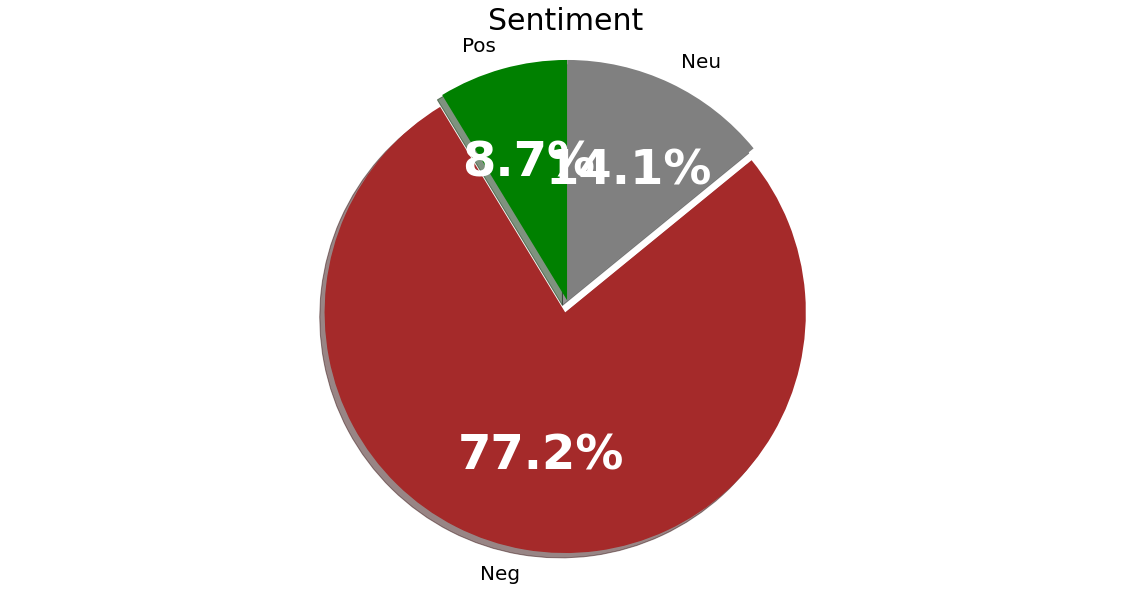

In [25]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pos', 'Neg', 'Neu'
sizes = [len(pos), len(neg), len(neu)]
colors = 'green','brown','grey'

explode = (0, 0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,10))
_, _, autopcts = ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90,
       textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':48})
ax1.set_title('Sentiment', fontdict={'fontsize': 30})

plt.show()

In [26]:
pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
neg.sort_values(by=['sentiment_score'], inplace=True)

<ipython-input-26-17f8801a99d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
<ipython-input-26-17f8801a99d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg.sort_values(by=['sentiment_score'], inplace=True)


In [31]:
pos[['clean_text', 'sentiment_score']].head(10)

,clean_text,sentiment_score
386,love governor desantis great role model child,0.9
27,good thing desantis got great covid story writ...,0.9
192,exactly right thing perfect desantis right for...,0.9
181,perfection love duh desantis gaetz sending nude,0.9
153,ron desantis impeccable extraordinaire and bey...,0.9
606,love governor desantis great role model child,0.9
427,respect gov desantis thanks showing appreciati...,0.8
720,liked one quote give one mine ... ron desantis...,0.8
773,real patriot support desantis,0.7
784,real patriot support desantis,0.7


In [32]:
neg[['clean_text', 'sentiment_score']].head(10)

,clean_text,sentiment_score
100,how stupid desantis stupid enough lose busines...,-0.9
274,this disgusting how stop state run power hungr...,-0.9
124,how stupid desantis stupid enough lose busines...,-0.9
161,how stupid desantis stupid enough lose busines...,-0.9
65,how stupid desantis stupid enough lose busines...,-0.9
968,why business dumb fuck https://t.co/z6niafofsj,-0.9
392,answered question question nice know actual re...,-0.9
651,flashback day ago bunch outrage desantis annou...,-0.8
647,ron desantis undermining right vote criminaliz...,-0.8
643,flashback day ago bunch outrage desantis annou...,-0.8


## Tweet Distribution

Model 1 : GCP


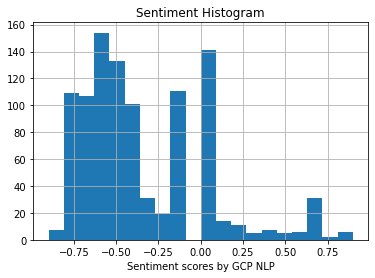

Total Tweets : 1000
Neutral Tweets : 141
Positive Tweets : 87
Negative Tweets : 772


In [33]:
print('Model 1 : GCP')
df['sentiment_score'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment scores by GCP NLP')
plt.show()
print('Total Tweets : ' + str(len(df)))
print('Neutral Tweets : ' + str((df['sentiment_score'] == 0).sum()))
print('Positive Tweets : ' + str((df['sentiment_score'] > 0).sum()))
print('Negative Tweets : ' + str((df['sentiment_score'] < 0).sum()))

# Ignore below

## Cleaning of tweet corpus

In [25]:
# blobs = []                #This list holds the cleaned tweets

# for i in range(len(df)):
#     tweet = df['text'][i]
#     tweet = tweet.strip(punctuation).lower()
#     tweet = re.sub(r'http\S+', ' ', tweet)
#     tweet = re.sub(r'@\S+', ' ', tweet)
#     tweet = re.sub(r'#', '', tweet)
#     tweet = re.sub(r'[^a-z]+', ' ', tweet)
#     tweet = re.sub(r'rt', ' ', tweet)
    
#     blobs.append(tweet)

## Model 2 : TextBlob

In [26]:
# polarity = []
# #subjectivity = []

# for i in range(len(blobs)):
#     xyz = TextBlob(blobs[i])
#     polarity.append(xyz.sentiment.polarity)
# #    subjectivity.append(xyz.sentiment.subjectivity)

In [27]:
# df['TextBlob_score'] = polarity
# #df['subjectivity'] = subjectivity

In [29]:
# df['TextBlob_score'].mean()

0.07414199775128084

## Model 3 : Vader

In [30]:
# analyzer = SentimentIntensityAnalyzer()
# sentiment = {}
# pol = [0]*len(df)
    
# for i in range(len(df)):
#     tweet = df['text'][i]
#     sentiment[i] = analyzer.polarity_scores(tweet)
#     pol[i] = sentiment[i]['compound']
# df['Vader_score'] = pol

## Results

Model 2 : TextBlob


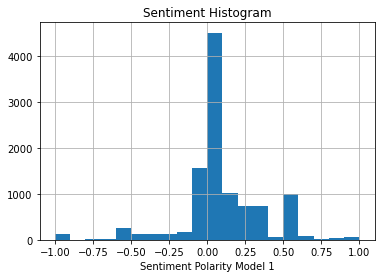

Total Tweets : 10824
Neutral Tweets : 4115
Positive Tweets : 4177
Negative Tweets : 2532


In [35]:
# print('Model 2 : TextBlob')
# df['TextBlob_score'].hist(bins=20)
# plt.title('Sentiment Histogram')
# plt.xlabel('Sentiment Polarity by TextBlob')
# plt.show()
# print('Total Tweets : ' + str(len(df)))
# print('Neutral Tweets : ' + str((df['TextBlob_score'] == 0).sum()))
# print('Positive Tweets : ' + str((df['TextBlob_score'] > 0).sum()))
# print('Negative Tweets : ' + str((df['TextBlob_score'] < 0).sum()))

Model 3 : Vader


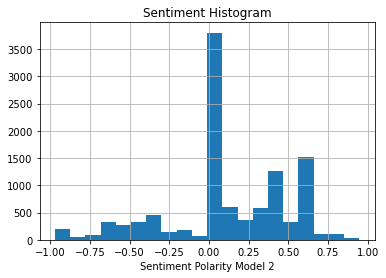

Total Tweets : 10824
Neutral Tweets : 3645
Positive Tweets : 5045
Negative Tweets : 2134


In [36]:
# print('Model 3 : Vader')
# df['Vader_score'].hist(bins=20)
# plt.title('Sentiment Histogram')
# plt.xlabel('Sentiment Polarity by Vader')
# plt.show()
# print('Total Tweets : ' + str(len(df)))
# print('Neutral Tweets : ' + str((df['Vader_score'] == 0).sum()))
# print('Positive Tweets : ' + str((df['Vader_score'] > 0).sum()))
# print('Negative Tweets : ' + str((df['Vader_score'] < 0).sum()))

Model 1 : GCP


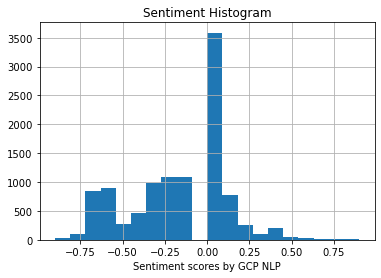

Total Tweets : 10824
Neutral Tweets : 3587
Positive Tweets : 1438
Negative Tweets : 5799


In [37]:
print('Model 1 : GCP')
df['sentiment_score'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment scores by GCP NLP')
plt.show()
print('Total Tweets : ' + str(len(df)))
print('Neutral Tweets : ' + str((df['sentiment_score'] == 0).sum()))
print('Positive Tweets : ' + str((df['sentiment_score'] > 0).sum()))
print('Negative Tweets : ' + str((df['sentiment_score'] < 0).sum()))

In [34]:
# df.to_csv('analysis.csv',index=False,encoding='utf-8')

## Sample neutral

In [134]:
#sentiment = analyzer.polarity_scores('do you think florida should open eligibility for the covid vaccine to all adults')
#sentiment

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## Sample negative

In [128]:
#sentiment = analyzer.polarity_scores('wtf i live in florida and still cannot get the vaccine')
#sentiment

{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.5859}

## Sample positive

In [135]:
#sentiment = analyzer.polarity_scores('i am happy to say as a year old resident of florida i received my first moderna vaccine this morning ')
#sentiment

{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}